# AI Lab: Blokus


## Tile Detection


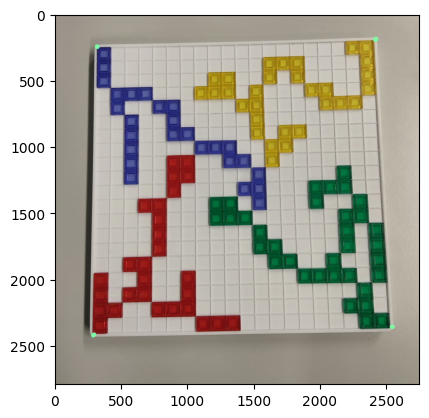

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image_path = "readme_files/input.png"

image = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

### Board Segmentation



0: 640x640 1 board, 648.0ms
Speed: 9.3ms preprocess, 648.0ms inference, 15.6ms postprocess per image at shape (1, 3, 640, 640)


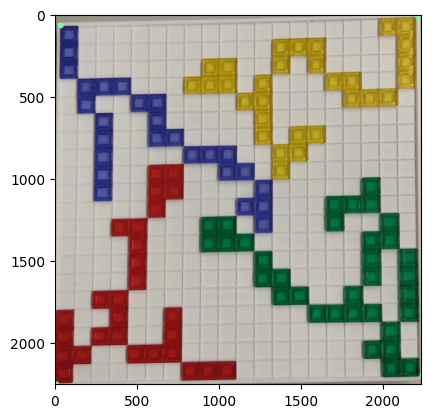

In [2]:
from src.detection import board_seg


img = image.copy()
img = cv2.bilateralFilter(img, 9, 75, 75)
img_segmented = board_seg.board_seg_by_model(img)
plt.imshow(cv2.cvtColor(img_segmented, cv2.COLOR_BGR2RGB))

### Image Normalization


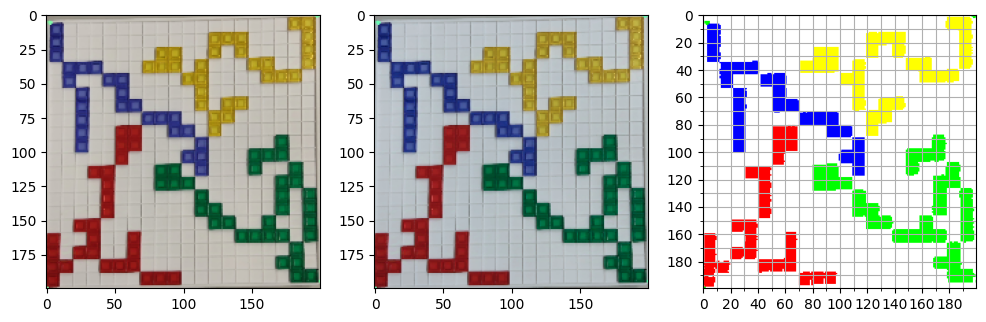

In [3]:
from src.detection import normalization


fig, axes = plt.subplots(1, 3, figsize=(12, 12))

img = cv2.resize(img_segmented, (200, 200))
ax = axes[0]
ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

img = normalization.__color_correction(img)
ax = axes[1]
ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

rgyb_thres = (167, 107, 167, 97)
img_normalized = normalization.__color_mapping(img, rgyb_thres)
ax = axes[2]
major_ticks = np.arange(0, 201, 20)
minor_ticks = np.arange(0, 201, 10)
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.grid(which="both")
ax.imshow(cv2.cvtColor(img_normalized, cv2.COLOR_BGR2RGB))

### Split Image into Grid

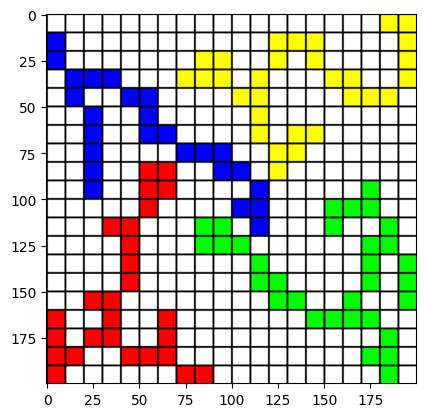

In [4]:
from src.detection import grid


img_mini, img_full = grid.generate_grid(img_normalized)
plt.imshow(cv2.cvtColor(img_full, cv2.COLOR_BGR2RGB))

In [55]:
from collections import Counter
from src.types.tiles import SquareColor


result = grid.detect_colors(img_mini)
print(Counter(result.flatten()))

pos_dict = dict((color, np.argwhere(result == color)) for color in SquareColor)
for key in pos_dict:
    print(f"{key:<6}", *pos_dict[key][:10], sep="\t")

Counter({EMPTY: 286, GREEN: 32, YELLOW: 30, RED: 27, BLUE: 25})
EMPTY 	[0 0]	[0 1]	[0 2]	[0 3]	[0 4]	[0 5]	[0 6]	[0 7]	[0 8]	[0 9]
RED   	[8 5]	[8 6]	[9 5]	[9 6]	[10  5]	[11  3]	[11  4]	[12  4]	[13  4]	[14  4]
GREEN 	[ 9 17]	[10 15]	[10 16]	[10 17]	[11  8]	[11  9]	[11 15]	[11 18]	[12  8]	[12  9]
BLUE  	[1 0]	[2 0]	[3 1]	[3 2]	[3 3]	[4 1]	[4 4]	[4 5]	[5 2]	[5 5]
YELLOW	[ 0 18]	[ 0 19]	[ 1 12]	[ 1 13]	[ 1 14]	[ 1 19]	[2 8]	[2 9]	[ 2 12]	[ 2 14]


In [56]:
!jupyter nbconvert --to markdown readme.ipynb

[NbConvertApp] Converting notebook readme.ipynb to markdown
[NbConvertApp] Support files will be in readme_files\
[NbConvertApp] Writing 3016 bytes to readme.md
